# IMDB Data


### Data

IMDb is a popular movie website that combines movie plot description, Metastore ratings, critic and user ratings and reviews, release dates, and many more aspects.
The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.
The ratings dataset includes 85,855 rating details from demographic perspective.

Data has been scraped from the publicly available website https://www.imdb.com.
All the movies with more than 100 votes have been scraped as of 01/01/2020.

The data can be downloaded here: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset


### Objectives

1. How has the total number of movies being produced each year changed over time? 


2. Analysis of the relationship between budget, worldwide gross income and average rating. 
    
    a) Is there a correlation between budget // worldwide gross income // average rating?
    
    b) How has budget spent on movies and commercial success developed over time?

    c) Which directors make the most commercially successful movies (on average)? 
    
    d) Which country produces the commercially most successful movies?


3. Movie Ratings

    a) Which countries produce the movies with the highest rating (on average)?
    
    b) Which genres have the highest rating (on average)?
    
    c) Is there a difference between female and male votes? 


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
movies = pd.read_csv('../data/imdb/IMDb_movies.csv')
ratings = pd.read_csv('../data/imdb/IMDb_ratings.csv')
pd.options.display.precision = 2

/Library/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movies.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0


In [5]:
ratings.head(3)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0


To reduce the size of the dataframe and get rid of some less popular movies, I will first filter the ratings dataset to only movies that have at least received 2000 votes and I will only keep columns that I will later work with.

In [6]:
ratings_filtered = ratings[ratings['total_votes']>=2000]
ratings_filtered = ratings_filtered[['imdb_title_id','weighted_average_vote', 'males_allages_avg_vote', 'females_allages_avg_vote','males_allages_votes', 'females_allages_votes','votes_10', 'votes_1' ]]

# 1. How has the total number of movies being produced  each year changed over time?


First I want to analyse how the number of movies being produced each year has evolved and which country or countries produce the most movies each year.
The columns 'year', 'budget' and 'worlwide_gross_income' are all of type object. For further analysis, they will have to be converted to int:

In [7]:
movies.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [8]:
movies.year.value_counts()

2017             3223
2018             3182
2016             2992
2015             2764
2014             2517
                 ... 
1966                1
TV Movie 2019       1
1962                1
1964                1
1992                1
Name: year, Length: 168, dtype: int64

In [9]:
movies['year'] = movies['year'].replace(['TV Movie 2019'],'2019').astype(int)

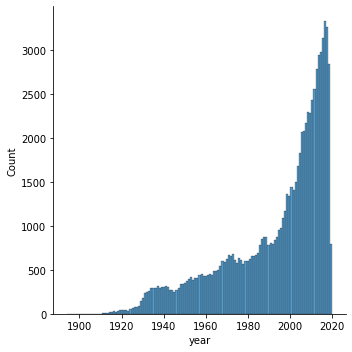

In [10]:
sns.displot(movies, x="year", bins=127)

In [11]:
print((movies['year'].values == 2018).sum()/(movies['year'].values == 1988).sum()-1)

2.7180365296803655


= > The number of movies being produced each year has been steadily growing. Compared to 30 years ago (since the data has been scraped on the 1st of January 2020, the data of movies produced in 2020 is not complete, I'm assuming the data of 2019 is also not complete, so I will take 2018 as my point of reference) there has been a growth of 271 %, which makes a compound annual growth rate of 4,47%.

# 2. Analyze the relationship between budget, world wide gross income and average rating. 


In [12]:
movies.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

As there is some N.A. data in both columns ('budget' and 'worlwide_gross_income'), we will drop the rows and only  evaluate budget and gross income for rows that have both values. Later I want to integrate the votes as well, so I am joining the ratings dataframe with the movies dataframe.

In [13]:
movies_joined = movies.merge(ratings_filtered, left_on='imdb_title_id', right_on='imdb_title_id')

In [14]:
movies_budget = movies_joined.dropna(subset=['budget', 'worlwide_gross_income'])
print(movies_budget.shape)
print(movies_budget['budget'].unique())
print(movies_budget['worlwide_gross_income'].unique())

(8708, 29)
['$ 18000' '$ 800000' '$ 250000' ... 'EUR 1420000' '$ 29900000'
 '$ 11100000']
['$ 8811' '$ 9183673' '$ 26916' ... '$ 379728' '$ 13681524' '$ 524061']


Both columns are objects and need to be converted and have the currency removed

In [15]:
movies_budget[['currency', 'budget']] = movies_budget['budget'].str.split(' ', 1, expand=True).copy()


/Library/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
movies_budget[['currency_2', 'worlwide_gross_income']] = movies_budget['worlwide_gross_income'].str.split(' ', 1, expand=True).copy()

In [17]:
print(movies_budget['currency_2'].value_counts())
print(movies_budget['currency'].value_counts().head(3))

$    8708
Name: currency_2, dtype: int64
$      7318
EUR     607
INR     195
Name: currency, dtype: int64


All values in gross income are in dollar, so I will drop all rows from the dataframe, where the currency of the budget is not given in dollar.

In [18]:
movies_budget = movies_budget[movies_budget.currency == '$'].astype({"worlwide_gross_income": int, "budget": int})

##    2 a) Is there a correlation between budget // worldwide gross income // average rating?


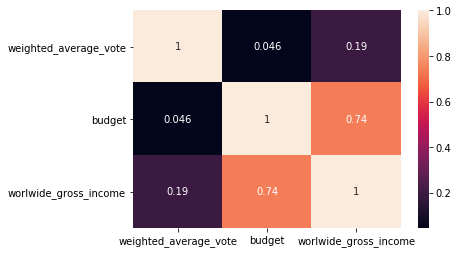

In [19]:
df = pd.DataFrame(movies_budget,columns=['weighted_average_vote','budget','worlwide_gross_income'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

=> (strong) positive relationship between budget and gross income

=> no relationship between budget and weighted average vote or between gross income and weighted average vote

## 2 b) How has budget spent on movies and commercial success developed over time?


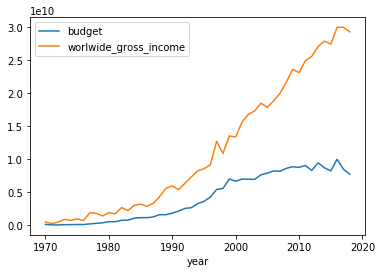

In [20]:
movies_1970_2018 = movies_budget[(movies_budget['year']>=1970) & (movies_budget['year']<=2018)]

movies_1970_2018_small = movies_1970_2018[['year','budget','worlwide_gross_income']].groupby('year')\
                            .agg({'budget': 'sum', 'worlwide_gross_income': 'sum'})
movies_1970_2018_small.plot()

=> While the budget spent on movie production seems to have stagnated or even sligthly dropped in recent years, the profitability of movies seems to have steadily grown over time. I personally would have expected the gross income to be stagnating as well, so this result is quite surprising.

## 2 c) Which directors make the most commercially successful movies (on average)? 


In [21]:
movies_gross_income_director = movies_1970_2018.groupby('director') \
       .agg(count=('country', 'count'), gross_income=('worlwide_gross_income', 'sum')) \
       .reset_index().nlargest(20, 'gross_income')

movies_gross_income_director['avg_gross_income_per_movie'] = (movies_gross_income_director['gross_income']/movies_gross_income_director['count']).astype('int64')
movies_gross_income_director.nlargest(15, 'avg_gross_income_per_movie').style.background_gradient(cmap ='coolwarm') 

,director,count,gross_income,avg_gross_income_per_movie
1189,James Cameron,7,6185441282,883634468
684,David Yates,6,5044302972,840717162
188,"Anthony Russo, Joe Russo",5,4050914983,810182996
1163,J.J. Abrams,5,3579845211,715969042
2259,Peter Jackson,11,6601458791,600132617
981,George Lucas,6,3442459149,573743191
1958,Michael Bay,13,6451692798,496284061
495,Christopher Nolan,10,4817173767,481717376
889,Francis Lawrence,7,3363674910,480524987
1223,James Wan,9,3708173136,412019237


## 2 d) Which country produces the commercially most successful movies?


In [22]:
movies_gross_income_per_movie = movies_1970_2018.groupby('country') \
       .agg(count=('country', 'count'), gross_income=('worlwide_gross_income', 'sum')) \
       .reset_index()
movies_gross_income_per_movie = movies_gross_income_per_movie[movies_gross_income_per_movie['count']>=25]

In [23]:
movies_gross_income_per_movie['gross_per_movie'] = (movies_gross_income_per_movie['gross_income']/movies_gross_income_per_movie['count']).astype('int64')
movies_gross_income_per_movie.nlargest(20, 'gross_per_movie').style.background_gradient(cmap ='coolwarm') 

,country,count,gross_income,gross_per_movie
622,"USA, Australia",39,6601092364,169258778
850,"USA, UK",157,23030206984,146689216
576,"UK, USA",197,23294206159,118244701
790,"USA, Japan",44,4295525979,97625590
711,"USA, Germany",108,9961485479,92235976
688,"USA, France",52,4657036664,89558397
618,USA,3837,318206630904,82931100
646,"USA, Canada",170,12586764460,74039790
253,"Germany, USA",71,4760165696,67044587
801,"USA, Mexico",49,3109862107,63466573


# 3. Movie ratings

## 3 a) Which countries produce the movies with the highest rating (on average)?


In [24]:
movies_country_rating = movies_joined.groupby('country') \
       .agg(count=('weighted_average_vote', 'count'), avg_vote=('weighted_average_vote', 'mean')) \
       .reset_index()
movies_country_rating_sorted = movies_country_rating[movies_country_rating['count'] >= 150].sort_values(by='avg_vote', ascending=False)
movies_country_rating_sorted

,country,count,avg_vote
946,Japan,492,7.10
1182,South Korea,188,7.00
779,India,1219,6.82
375,France,512,6.80
1586,"UK, USA",413,6.62
873,Italy,252,6.55
612,Germany,191,6.55
1931,"USA, UK",204,6.52
1364,UK,884,6.47
1338,Turkey,363,6.46


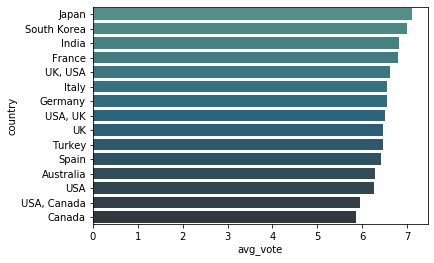

In [25]:
sns.barplot(x='avg_vote', y='country', data=movies_country_rating_sorted, palette=("crest_d"))


=>

## 3 b) Which genres have the highest rating (on average)?


As the column 'genre' often has more than value I will expand the dataframe in a way that each movie will be counted once for each allocated genre.

In [26]:
movies_genre_split = movies_joined.drop('genre', axis=1)\
                        .join(movies_joined.genre.str.split(',',expand=True)\
                        .stack().reset_index(drop=True, level=1)\
                        .rename('genre_split'))
movies_genre_split['genre_split'] = movies_genre_split['genre_split'].str.strip()
movies_genre_split.head(2)

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,reviews_from_users,reviews_from_critics,weighted_average_vote,males_allages_avg_vote,females_allages_avg_vote,males_allages_votes,females_allages_votes,votes_10,votes_1,genre_split
0,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,31.0,14.0,7.0,7.0,7.2,1607.0,215.0,210,87,Adventure
0,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,31.0,14.0,7.0,7.0,7.2,1607.0,215.0,210,87,Drama


In [27]:
movies_grouped_genre = movies_genre_split.groupby(['genre_split']) \
       .agg(count=('weighted_average_vote', 'count'), avg_vote=('weighted_average_vote', 'mean')) \
       .reset_index()
movies_grouped_genre_sorted = movies_grouped_genre.sort_values(by='avg_vote', ascending=False)

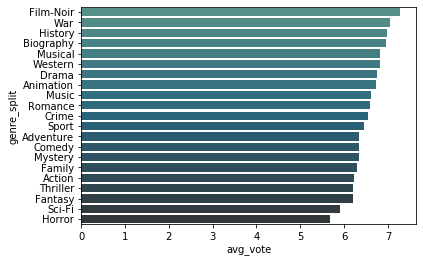

In [28]:
sns.barplot(x='avg_vote', y='genre_split', data=movies_grouped_genre_sorted, palette=("crest_d"))


## 3 c) Is there a difference between female and male votes? 


In [29]:
movies_grouped_genre_split = movies_genre_split.groupby('genre_split') \
       .agg(total_count=('weighted_average_vote', 'count'), avg_vote=('weighted_average_vote', 'mean'), \
        avg_male =('males_allages_avg_vote', 'mean'), avg_female = ('females_allages_avg_vote', 'mean'), total_men = ('males_allages_votes', 'sum'), total_women = ('females_allages_votes', 'sum')   ) \
       .reset_index()
movies_grouped_genre_split['diff'] = movies_grouped_genre_split['avg_male'] - movies_grouped_genre_split['avg_female']
movies_grouped_genre_split['female_share'] = ((movies_grouped_genre_split['total_women']/(movies_grouped_genre_split['total_men'] + movies_grouped_genre_split['total_women']))*100).round(2)
movies_grouped_genre_split = movies_grouped_genre_split[['genre_split','total_count', 'avg_vote','avg_male', 'avg_female','diff', 'female_share' ]]


In [31]:
pd.options.display.precision = 2
movies_grouped_genre_split.sort_values(by='diff', ascending=True).style.background_gradient(cmap ='coolwarm') 


,genre_split,total_count,avg_vote,avg_male,avg_female,diff,female_share
7,Family,900,6.30,6.17,6.60,-0.42,26.63
13,Musical,351,6.83,6.72,7.01,-0.29,28.92
8,Fantasy,1307,6.20,6.12,6.39,-0.27,21.06
2,Animation,710,6.74,6.66,6.92,-0.26,23.68
12,Music,536,6.61,6.53,6.79,-0.26,25.85
1,Adventure,2568,6.35,6.29,6.52,-0.23,17.48
15,Romance,3724,6.58,6.50,6.69,-0.19,29.42
3,Biography,1046,6.96,6.90,7.10,-0.19,19.15
4,Comedy,7338,6.33,6.27,6.45,-0.18,21.67
10,History,710,6.97,6.93,7.10,-0.17,17.67


=> the average of female votes is higher than the average male vote for all genres. It's also interesting that only between 11 and 29 % of all votes come from women. The genres 'Romance', 'Musical' or 'Family' have the highest share of female votes. 'Family' also shows the biggest difference in the average votes followed by 'Musical' and 'Fantasy'.